<a href="https://colab.research.google.com/github/kundan2403/ml-algo/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code implements linear regression using gradient descent to find the optimal parameters
𝑤
w and
𝑏
b for a linear model that predicts house prices based on their size. Here's a breakdown of what each part of the code does:


1. Imports: It imports necessary libraries - NumPy for numerical computations
   and Matplotlib for plotting

2. Example data: It defines some example training data where x_train represents the size of houses and y_train represents their prices.

3. Data normalization: The training data is normalized to prevent overflow during computation. This is done by subtracting the mean and dividing by the standard deviation for both x_train and y_train


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x_train = np.array([1, 2, 3, 4, 5], dtype='float')
y_train = np.array([300, 500, 700, 900, 1100], dtype='float')

# Normalize data to prevent overflow
x_mean = np.mean(x_train)
x_std = np.std(x_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

x_train_normalized = (x_train - x_mean) / x_std
y_train_normalized = (y_train - y_mean) / y_std

Cost function: The compute_cost function calculates the mean squared error (MSE) between the predicted values and the actual values for the given parameters
𝑤
w and
𝑏
b.

Gradient function: The gradient_function computes the gradient of the cost function with respect to
𝑤
w and
𝑏
b using the partial derivatives.

In [19]:
# Cost function
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    cost /= 2 * m
    return cost

# Gradient function
def gradient_function(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

Gradient descent function: The gradient_descent function performs gradient descent to minimize the cost function. It iteratively updates the parameters
𝑤
w and
𝑏
b using the gradients computed from the gradient_function. It also keeps track of the cost and parameter values at each iteration.

In [20]:
# Gradient descent function
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    J_history = []
    p_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:  # prevent resource exhaustion
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w, b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}  ",
                  f"w: {w:0.3e}, b: {b:0.5e}")
    return w, b, J_history, p_history  # return w and J, w history for graphing


Parameter initialization and setting hyperparameters: Initial values for
𝑤
w and
𝑏
b, learning rate (alpha), and the number of iterations (iterations) are set.

Running gradient descent: The gradient_descent function is called with the normalized training data and hyperparameters.

Scaling back parameters: After obtaining the optimal parameters
𝑤
w and
𝑏
b in the normalized space, they are scaled back to the original scale using the means and standard deviations of the original data.

In [21]:
# Initialize parameters
w_init = 0
b_init = 0
alpha = 1.0e-2
iterations = 1000

# Run gradient descent
w, b, J_hist, p_hist = gradient_descent(x_train_normalized, y_train_normalized, w_init, b_init, alpha, iterations)

# Scale back the parameters to original scale
w_final = w * (y_std / x_std)
b_final = y_mean - w_final * x_mean

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 4.90e-01  dj_dw: -1.000e+00, dj_db: 0.000e+00   w: 1.000e-02, b: 0.00000e+00
Iteration  100: Cost 6.57e-02  dj_dw: -3.660e-01, dj_db: 0.000e+00   w: 6.376e-01, b: 2.22045e-18
Iteration  200: Cost 8.80e-03  dj_dw: -1.340e-01, dj_db: 0.000e+00   w: 8.674e-01, b: 3.33067e-18
Iteration  300: Cost 1.18e-03  dj_dw: -4.904e-02, dj_db: 0.000e+00   w: 9.514e-01, b: 3.33067e-18
Iteration  400: Cost 1.58e-04  dj_dw: -1.795e-02, dj_db: 0.000e+00   w: 9.822e-01, b: 3.33067e-18
Iteration  500: Cost 2.12e-05  dj_dw: -6.570e-03, dj_db: 6.939e-19   w: 9.935e-01, b: 2.76862e-18
Iteration  600: Cost 2.83e-06  dj_dw: -2.405e-03, dj_db: 5.204e-19   w: 9.976e-01, b: 2.26034e-18
Iteration  700: Cost 3.80e-07  dj_dw: -8.803e-04, dj_db: 3.903e-19   w: 9.991e-01, b: 1.84184e-18
Iteration  800: Cost 5.09e-08  dj_dw: -3.222e-04, dj_db: 3.036e-19   w: 9.997e-01, b: 1.50769e-18
Iteration  900: Cost 6.82e-09  dj_dw: -1.179e-04, dj_db: 2.494e-19   w: 9.999e-01, b: 1.23415e-18
(w,b) found by gradi

This section of the code is responsible for plotting the training data along with the linear regression prediction line

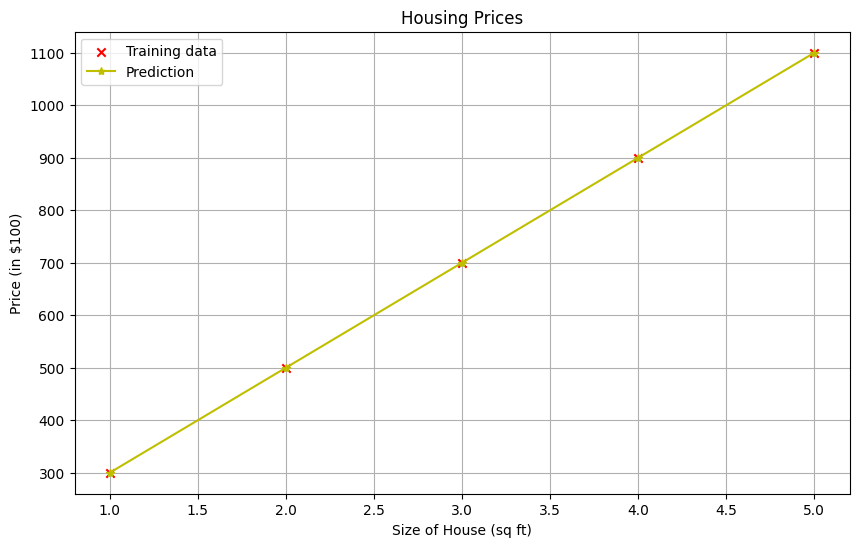

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', color='red', label='Training data')
plt.plot(x_train, w_final * x_train + b_final, marker='*', color='y', label='Prediction')
plt.title("Housing Prices")
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price (in $100)')
plt.grid(True)
plt.legend()
plt.show()

This part of the code plots the cost function's value versus the iteration step during the gradient descent process

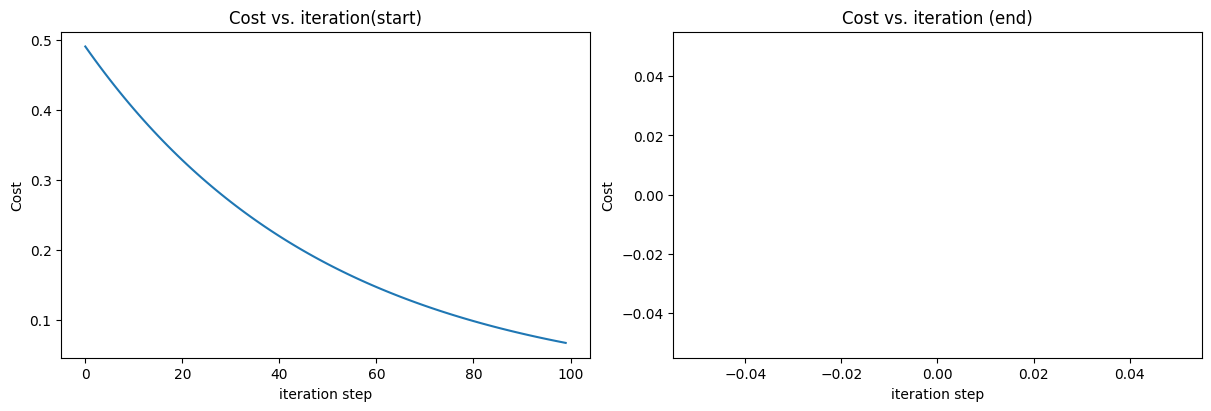

In [35]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

This part of the code defines a function predict(x, w, b) to predict house prices based on their size using the trained linear regression model. It also includes test data for evaluating the model and plots the test data along with the model's predictions. Additionally, it prints the predictions for specific house sizes. Let's break down each part

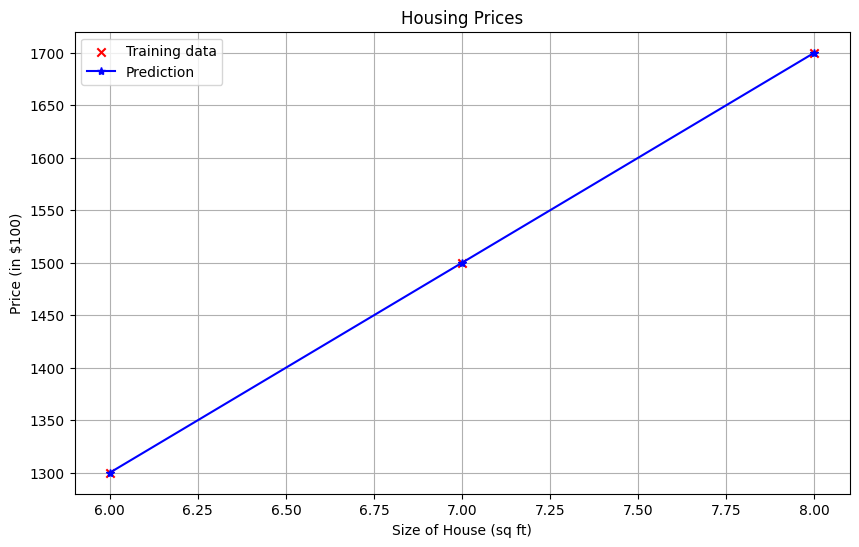

600 sqft house prediction 1300.0 Hundred  dollars
700 sqft house prediction 1500.0 Hundred dollars
800 sqft house prediction 1700.0 Hundred dollars


In [32]:
def predict(x, w, b):
    predicts = []
    for i in range(len(x)):
        f_wb =  w * x[i] + b
        predicts.append(f_wb)
    return predicts


x_test = np.array([6, 7, 8], dtype='float')
y_test = np.array([1300, 1500, 1700], dtype='float')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, marker='x', color='red', label='Training data')
plt.plot(x_test, predict(x_test, w_final, b_final), marker='*', color='b', label='Prediction')
plt.title("Housing Prices")
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price (in $100)')
plt.grid(True)
plt.legend()
plt.show()

print(f"600 sqft house prediction {w_final*6.0 + b_final:0.1f} Hundred  dollars")
print(f"700 sqft house prediction {w_final*7.0 + b_final:0.1f} Hundred dollars")
print(f"800 sqft house prediction {w_final*8.0 + b_final:0.1f} Hundred dollars")